# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset diambil dari kaggle dengan keyword "BankChunners" dengan link https://www.kaggle.com/datasets/nivedabhat/bankchurners
   
2. **Perkenalan Dataset**:

   Dataset ini terdiri dari **10.127 baris** dan **21 kolom**, mencakup berbagai atribut pelanggan seperti usia, jenis kelamin, tingkat pendidikan, status pernikahan, kategori pendapatan, serta berbagai metrik transaksi seperti batas kredit, saldo berputar, dan jumlah transaksi.

   Beberapa kolom utama dalam dataset ini:

   - **Customer_Age** (Numerikal) – Usia pelanggan.
   - **Gender** (Kategorikal) – Jenis kelamin pelanggan.
   - **Education_Level** (Kategorikal) – Tingkat pendidikan pelanggan.
   - **Marital_Status** (Kategorikal) – Status pernikahan pelanggan.
   - **Income_Category** (Kategorikal) – Kategori pendapatan pelanggan.
   - **Credit_Limit** (Numerikal) – Batas kredit pelanggan.
   - **Total_Trans_Amt** (Numerikal) – Total jumlah transaksi pelanggan.
   - **Total_Trans_Ct** (Numerikal) – Total jumlah transaksi yang dilakukan.
   - **Avg_Utilization_Ratio** (Numerikal) – Rasio penggunaan rata-rata dari batas kredit pelanggan.


3. **Install Pip yang dibutuhkan**


   Install pip yang sekiranya dibutuhkan 

In [3]:
pip install pandas matplotlib seaborn numpy scipy scikit-learn datasist yellowbrick

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached datasist-1.5.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached datasist-1.5.3-py3-none-any.whl (33 kB)
Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached nltk-3.9.


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# **2. Import Library**

In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
import pickle

from matplotlib.colors import ListedColormap
from matplotlib.ticker import PercentFormatter
from scipy.spatial import ConvexHull

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from datasist.structdata import detect_outliers

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE

# **3. Memuat Dataset**

In [226]:
bank_df = pd.read_csv("./BankChurners.csv")
bank_df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

In [227]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [228]:
print(f"Dataset memiliki {bank_df.shape[0]} baris dan {bank_df.shape[1]} kolom.")

Dataset memiliki 10127 baris dan 19 kolom.


In [229]:
bank_df.dtypes

Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [230]:
bank_df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## 2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

In [231]:
bank_df.isna().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [232]:
print("Jumlah duplikasi: ", bank_df.duplicated().sum())

Jumlah duplikasi:  0


## 3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.


In [233]:
# Analisis statistik deskriptif
bank_df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [234]:
# Memisahkan kolom numerik dan kategorikal
numerical_cols = bank_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = bank_df.select_dtypes(include=['object']).columns.tolist()

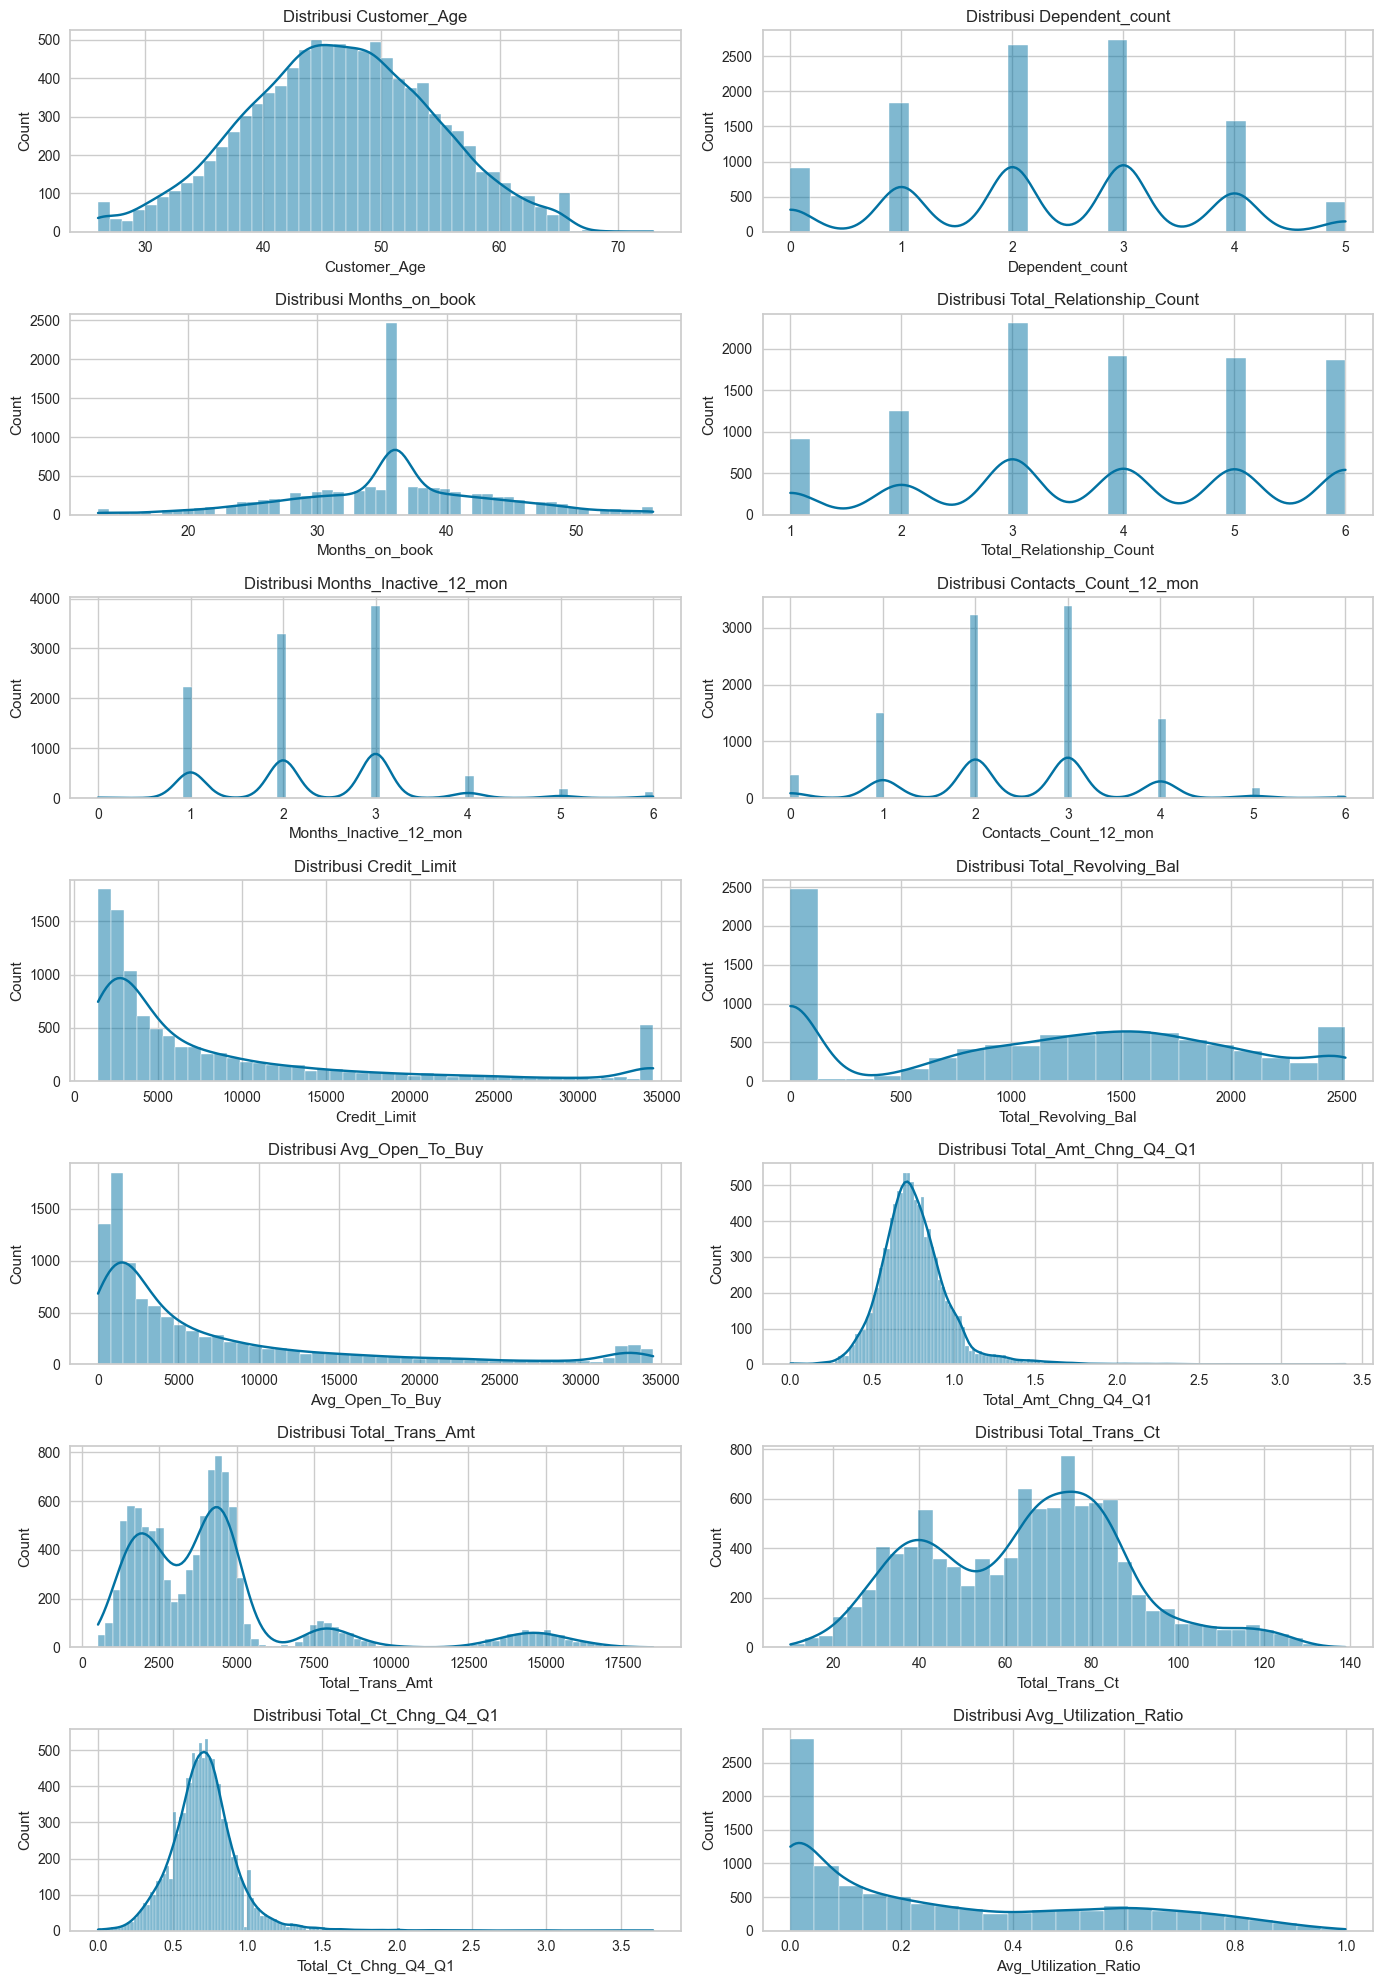

In [235]:
plt.figure(figsize=(14, 20))

# Menentukan jumlah baris secara dinamis
num_cols = len(numerical_cols)
num_rows = math.ceil(num_cols / 2)  # 2 kolom per baris

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 2, i)  # Menggunakan jumlah baris yang dihitung
    sns.histplot(data=bank_df, x=col, kde=True)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()


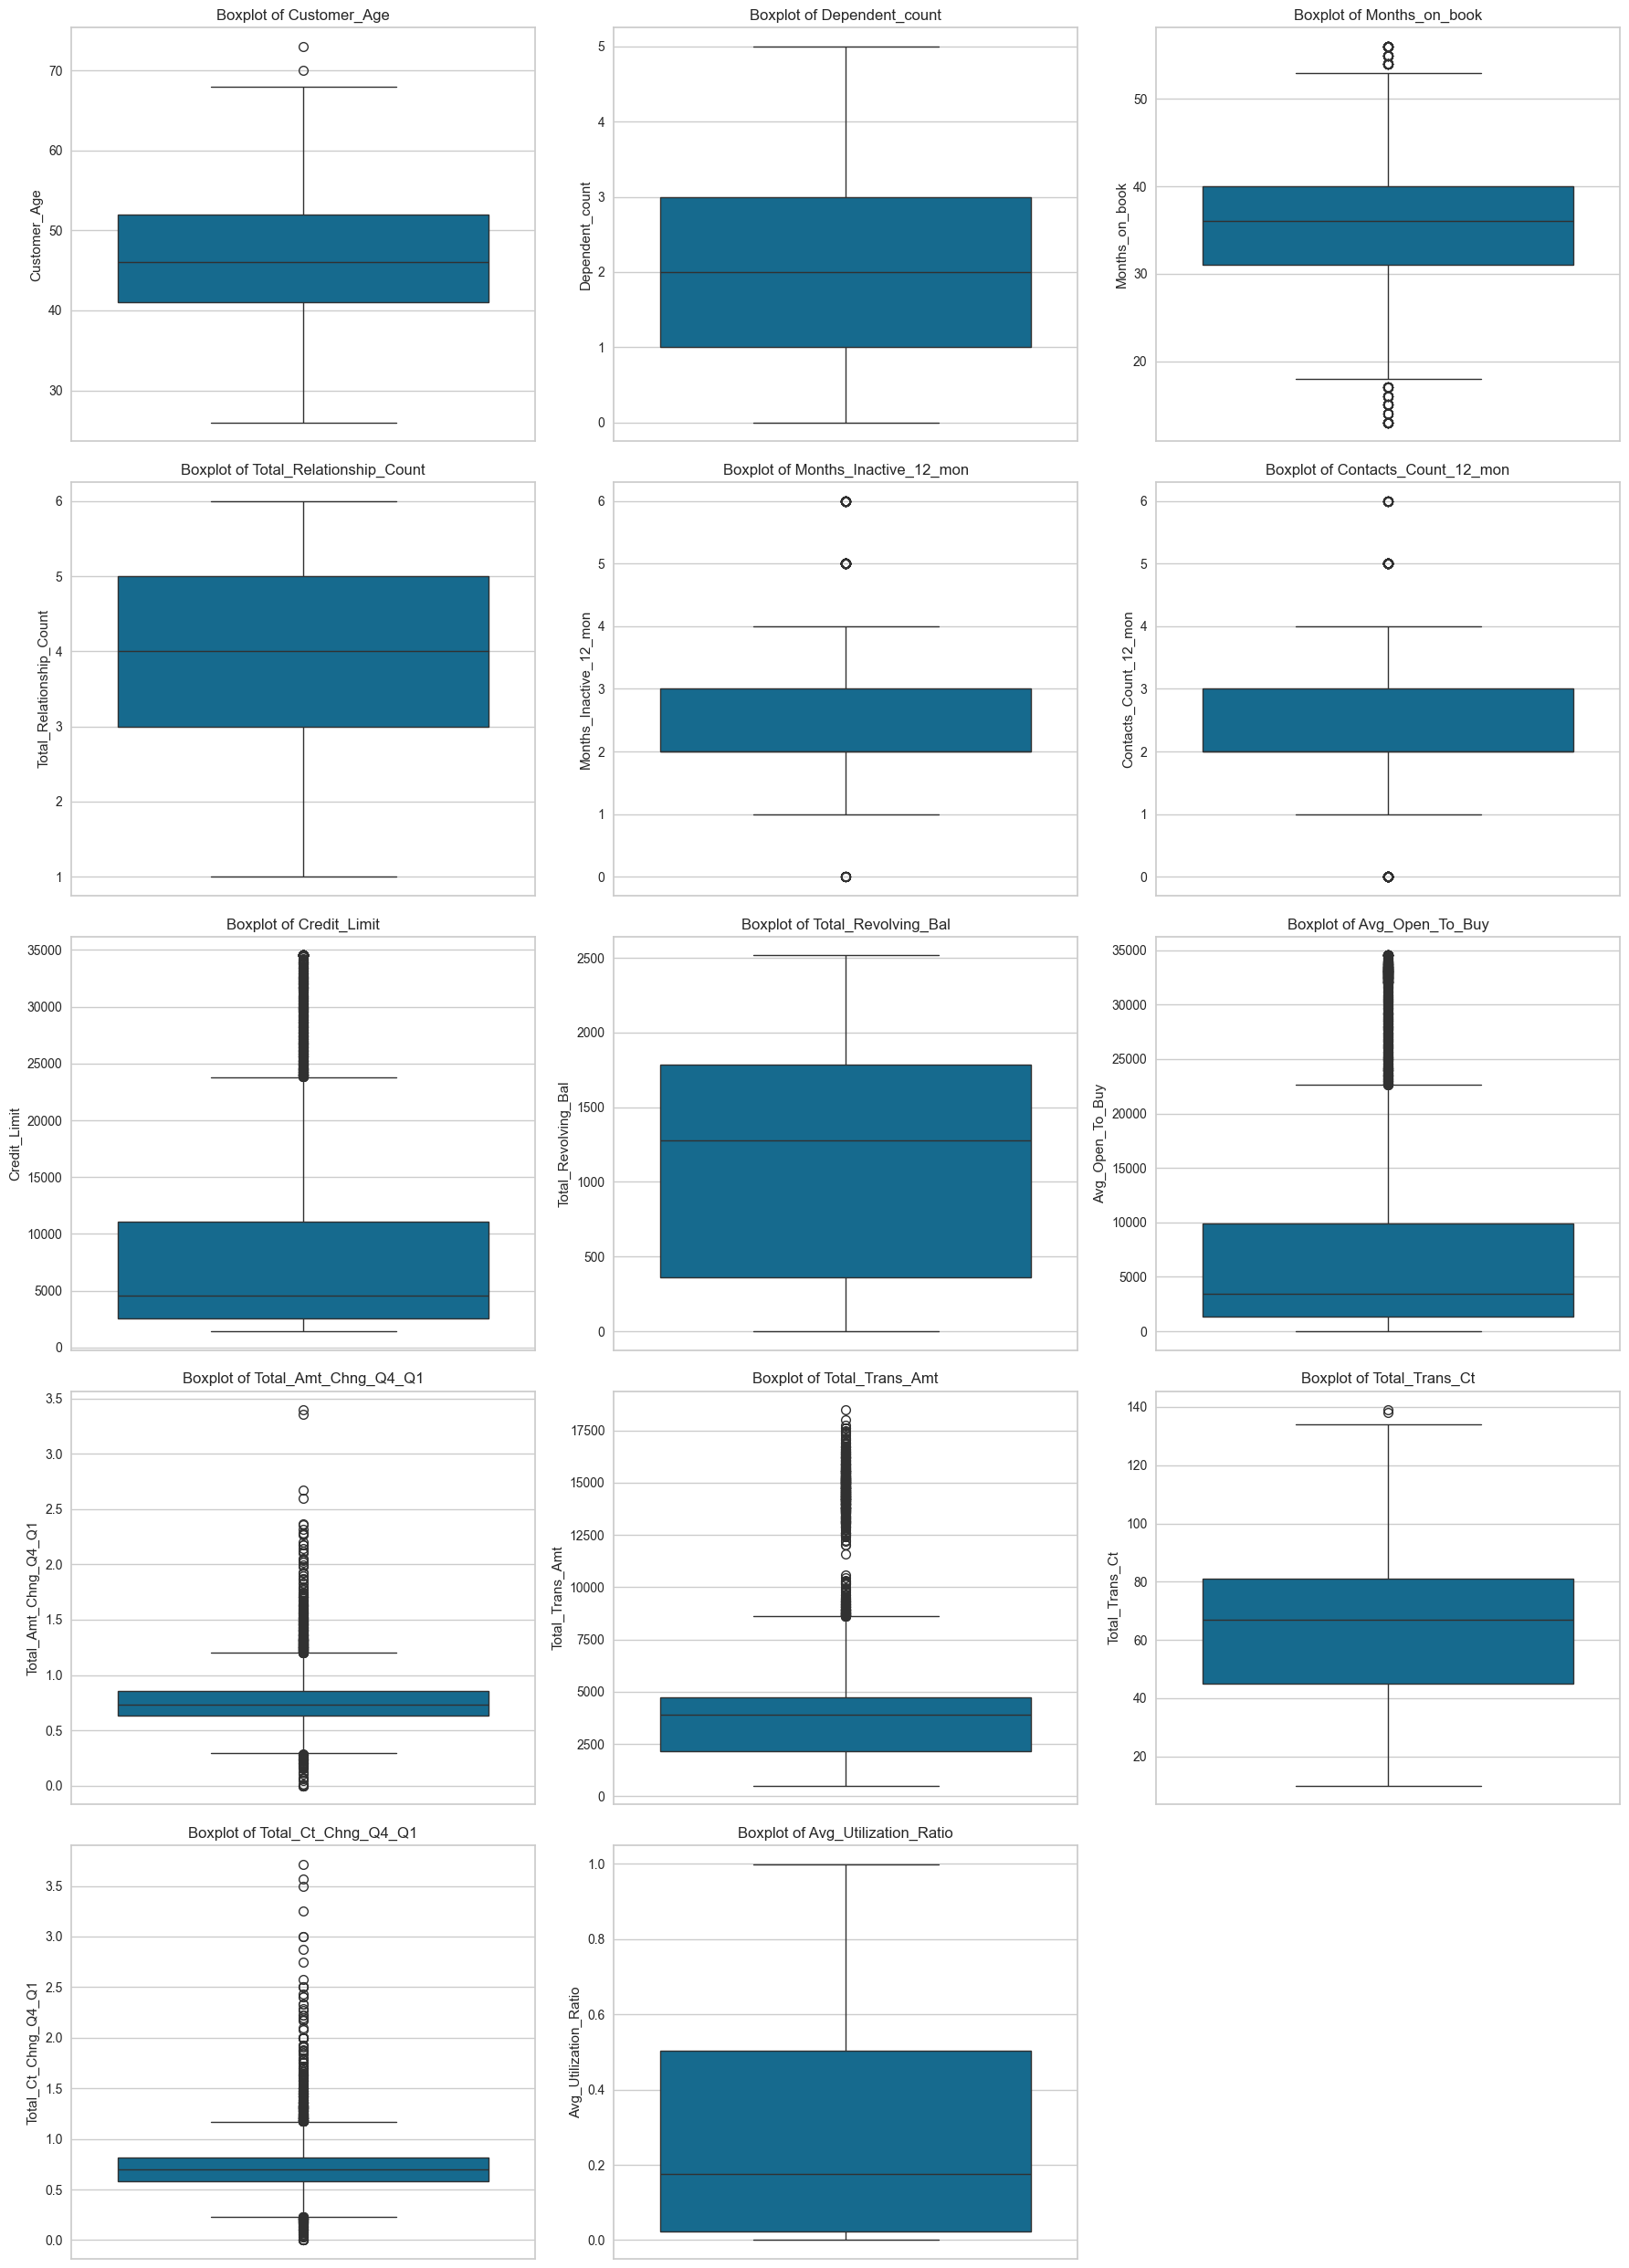

In [236]:
# Tentukan jumlah kolom yang akan ditampilkan dalam satu baris
num_cols = 3  # Menampilkan 3 boxplot per baris (bisa disesuaikan)
num_vars = len(numerical_cols)  # Jumlah variabel numerik
num_rows = math.ceil(num_vars / num_cols)  # Hitung jumlah baris yang diperlukan

# Buat figure dengan ukuran yang cukup besar
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 5))

# Pastikan axes berbentuk array 2D (untuk menangani kasus 1 baris)
axes = np.array(axes).reshape(num_rows, num_cols)

# Loop untuk membuat boxplot
for i, col in enumerate(numerical_cols):
    row, col_idx = divmod(i, num_cols)
    sns.boxplot(data=bank_df, y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot of {col}', fontsize=12)

# Hapus subplot kosong jika jumlah variabel kurang dari subplot grid
for i in range(num_vars, num_rows * num_cols):
    row, col_idx = divmod(i, num_cols)
    fig.delaxes(axes[row, col_idx])  # Menghapus subplot kosong

plt.tight_layout()
plt.show()


In [237]:
# Matriks korelasi untuk bank_df (Hanya bisa untuk kolom numerik)
bank_df[numerical_cols].corr()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808
Total_Amt_Chng_Q4_Q1,-0.062042,-0.035439,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235


## 4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.


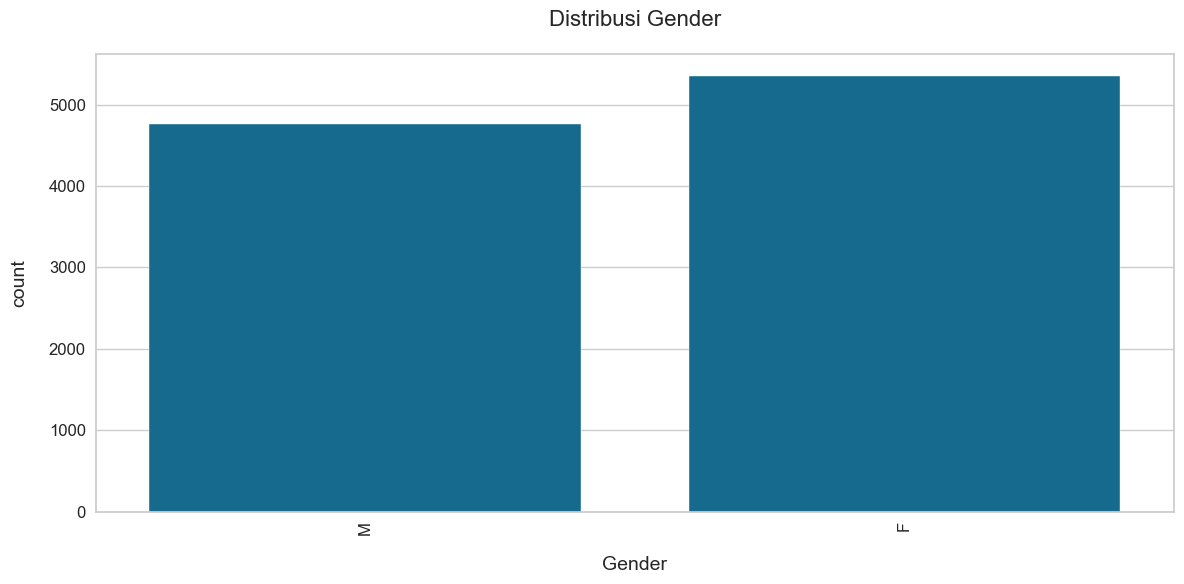

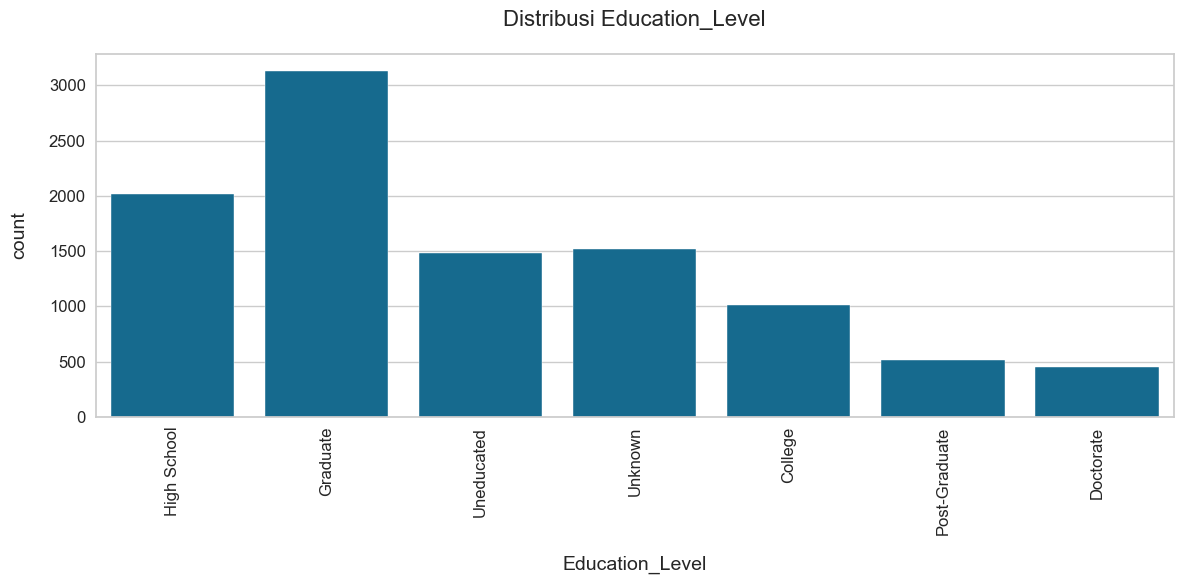

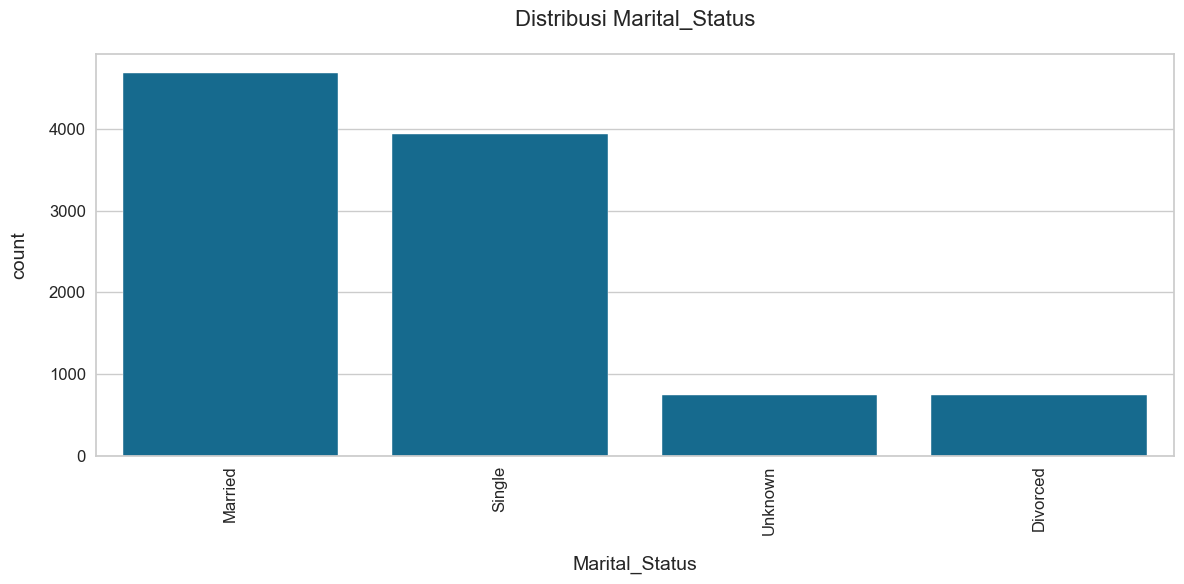

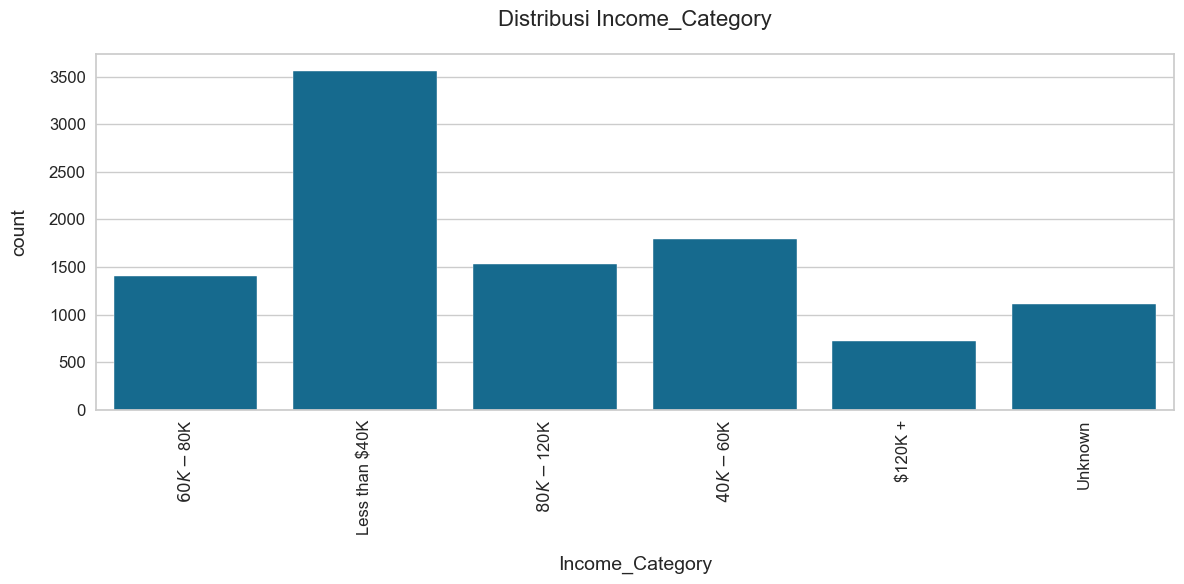

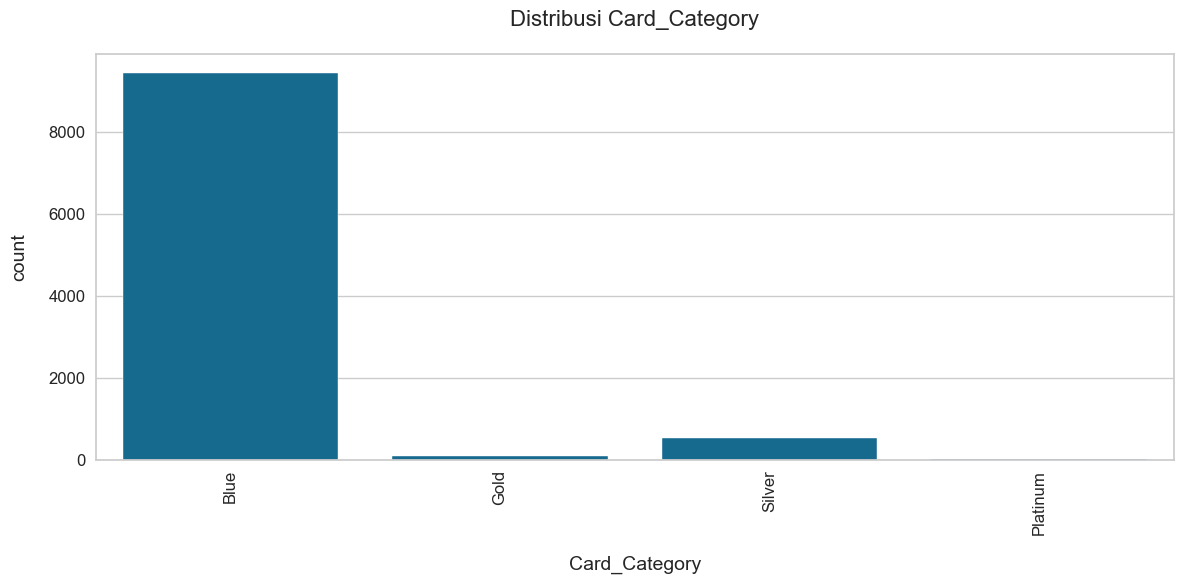

In [238]:
# Create separate plots for each categorical variable instead of subplots
for col in categorical_cols:
    plt.figure(figsize=(12, 6))  # Individual figure for each plot with good width-to-height ratio
    
    # Create the countplot
    ax = sns.countplot(data=bank_df, x=col)
    
    # Rotate x-labels and set fontsize
    plt.xticks(rotation=90, fontsize=12)  # Vertical labels to avoid overlap
    plt.yticks(fontsize=12)
    
    # Add proper spacing
    plt.title(f'Distribusi {col}', fontsize=16, pad=20)
    plt.xlabel(col, fontsize=14, labelpad=15)
    plt.ylabel('count', fontsize=14, labelpad=15)
    
    # For dates or many categories, limit the number of x-ticks shown
    if col == 'Posted On' or len(bank_df[col].unique()) > 20:
        # Show every nth label to avoid overcrowding
        n = max(1, len(ax.get_xticklabels()) // 10)  # Show ~10 labels
        [l.set_visible(False) for i, l in enumerate(ax.get_xticklabels()) if i % n != 0]
    
    # Add more bottom margin for x-labels
    plt.subplots_adjust(bottom=0.3)
    
    plt.tight_layout()
    plt.show()

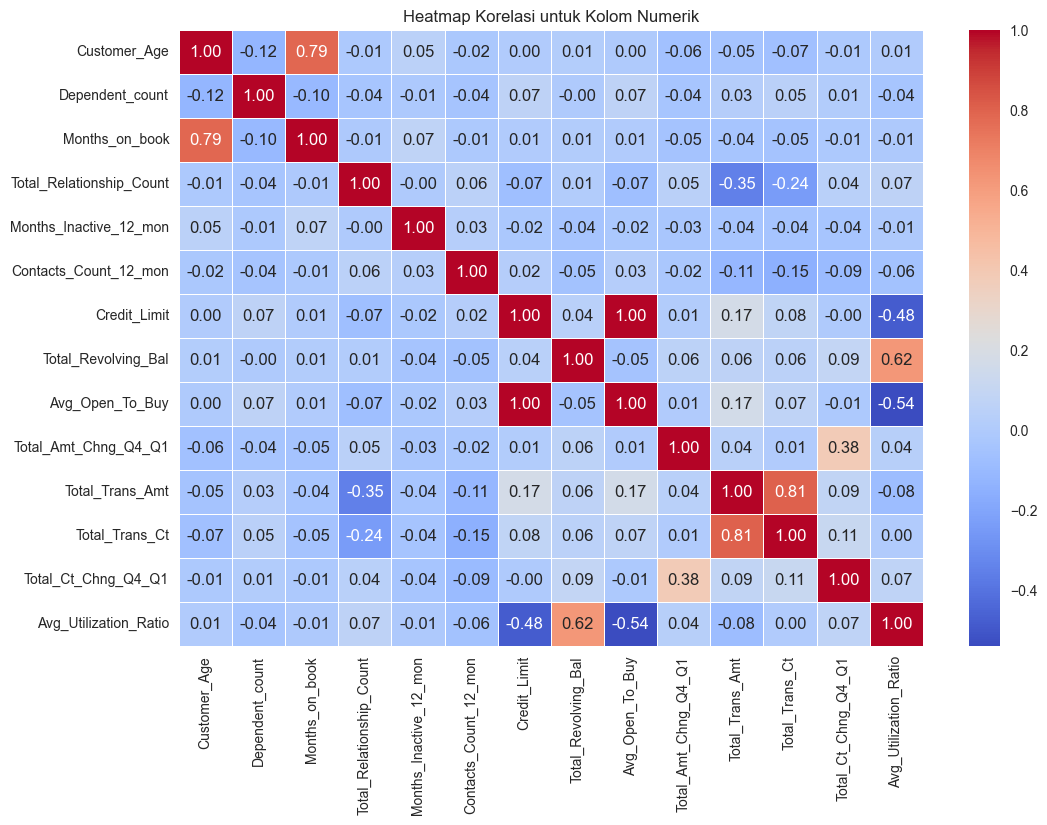

In [239]:
# Hitung matriks korelasi hanya untuk kolom numerik
corr_matrix = bank_df[numerical_cols].corr()

# Buat ukuran figure
plt.figure(figsize=(12, 8))

# Heatmap korelasi dengan annotasi
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Heatmap Korelasi untuk Kolom Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## 1. Menghapus atau Menangani Data Kosong (Missing Values)

In [240]:
#Menangani Data Kosong dengan menggunakan Nilai Terbanyak

# Mengisi nilai kosong dengan modus (nilai terbanyak)
bank_df['Education_Level'] = bank_df['Education_Level'].fillna(bank_df['Education_Level'].mode()[0])
bank_df['Marital_Status'] = bank_df['Marital_Status'].fillna(bank_df['Marital_Status'].mode()[0])

# Cek kembali apakah masih ada nilai kosong
print(bank_df.isna().sum())


Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [241]:
# Drop values "Unknown"pada kolom 'Income_Category'
bank_df = bank_df.drop(bank_df[bank_df['Income_Category'] == 'Unknown'].index)

## 2. Menghapus Data Duplikat jika ada

In [242]:
print("Jumlah duplikasi: ", bank_df.duplicated().sum())

Jumlah duplikasi:  0


## 3. Normalisasi Fitur

In [243]:
scaler = MinMaxScaler()
bank_df[numerical_cols] = scaler.fit_transform(bank_df[numerical_cols])
bank_df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.404255,M,0.6,High School,Married,$60K - $80K,Blue,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061
1,0.489362,F,1.0,Graduate,Single,Less than $40K,Blue,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105
2,0.531915,M,0.6,Graduate,Married,$80K - $120K,Blue,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000
3,0.297872,F,0.8,High School,Unknown,Less than $40K,Blue,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760761
4,0.297872,M,0.6,Uneducated,Married,$60K - $80K,Blue,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000000


## 4. Deteksi dan Penanganan Outlier

In [244]:
# Fungsi helper untuk mendeteksi outlier menggunakan IQR
def calculate_outliers(data):
    """
    Menghitung nilai outlier dalam data menggunakan metode IQR.
    Mengembalikan list nilai yang dianggap outlier.
    """
    q25, q75 = np.percentile(data.dropna(), [25, 75])
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    return data[(data < minimum) | (data > maximum)].tolist()

# Fungsi untuk mengecek outlier di setiap kolom numerik
def check_outliers(bank):
    print("\n=== Outliers per Kolom ===")
    for col in bank.select_dtypes(include=[np.number]).columns:
        outliers = calculate_outliers(bank[col])
        print(f"Kolom '{col}' memiliki {len(outliers)} outlier")

# Fungsi untuk mengisi missing value dengan median atau mode
def clean_missing_values(bank):
    for col in bank.columns:
        missing_count = bank[col].isnull().sum()
        if missing_count > 0:
            if pd.api.types.is_numeric_dtype(bank[col]):
                median_val = bank[col].median()
                bank[col].fillna(median_val, inplace=True)
                print(f"Kolom '{col}' memiliki {missing_count} missing value. Diisi dengan median: {median_val}.")
            else:
                mode_val = bank[col].mode()[0]
                bank[col].fillna(mode_val, inplace=True)
                print(f"Kolom '{col}' non-numerik memiliki {missing_count} missing value. Diisi dengan mode: {mode_val}.")
    return bank

# Fungsi untuk mengisi missing value dengan nilai sebelumnya (forward & backward fill)
def fill_missing_with_previous(bank, columns=None):
    if columns is None:
        columns = bank.columns[bank.isnull().any()].tolist()
    
    for col in columns:
        missing_before = bank[col].isnull().sum()
        bank[col].fillna(method="ffill", inplace=True)
        bank[col].fillna(method="bfill", inplace=True)
        missing_after = bank[col].isnull().sum()
        print(f"Kolom '{col}': missing count sebelum = {missing_before}, setelah = {missing_after}")
    
    return bank

# Fungsi untuk menerapkan winsorizing pada outlier
def auto_winsorize(bank, lower_quantile=0.05, upper_quantile=0.95):
    for col in bank.select_dtypes(include=[np.number]).columns:
        outliers = calculate_outliers(bank[col])
        if outliers:
            lower, upper = bank[col].quantile([lower_quantile, upper_quantile])
            bank[col] = bank[col].clip(lower, upper)
            print(f"Kolom '{col}' memiliki {len(outliers)} outlier, winsorized dengan batas bawah {lower} dan atas {upper}.")
        else:
            print(f"Kolom '{col}' tidak memiliki outlier.")
    return bank

# Fungsi untuk menerapkan transformasi log pada outlier negatif
def auto_transform_negative_outliers(bank):
    for col in bank.select_dtypes(include=[np.number]).columns:
        outliers = calculate_outliers(bank[col])
        num_outliers = len(outliers)
        if num_outliers > 0:
            if (bank[col] <= 0).any():
                shift = abs(bank[col].min()) + 1
                bank[col] = np.log1p(bank[col] + shift)
                print(f"Kolom '{col}' memiliki {num_outliers} outlier dan nilai negatif/nol, diterapkan shift sebesar {shift} dan transformasi log.")
            else:
                bank[col] = np.log1p(bank[col])
                print(f"Kolom '{col}' memiliki {num_outliers} outlier, transformasi log1p diterapkan.")
        else:
            print(f"Kolom '{col}' tidak memiliki outlier.")
    return bank

# Fungsi untuk menampilkan baris yang mengandung nilai negatif
def show_negative_rows(bank, columns=None):
    if columns is None:
        columns = bank.select_dtypes(include=[np.number]).columns
    negative_rows = bank[(bank[columns] < 0).any(axis=1)]
    print("Baris-baris dengan nilai negatif:")
    print(negative_rows)
    return negative_rows


In [245]:
bank_df = auto_winsorize(bank_df)
print("\n")

Kolom 'Customer_Age' memiliki 2 outlier, winsorized dengan batas bawah 0.14893617021276595 dan atas 0.723404255319149.
Kolom 'Dependent_count' tidak memiliki outlier.
Kolom 'Months_on_book' memiliki 504 outlier, winsorized dengan batas bawah 0.2093023255813954 dan atas 0.8372093023255814.
Kolom 'Total_Relationship_Count' tidak memiliki outlier.
Kolom 'Months_Inactive_12_mon' memiliki 290 outlier, winsorized dengan batas bawah 0.16666666666666666 dan atas 0.6666666666666666.
Kolom 'Contacts_Count_12_mon' memiliki 568 outlier, winsorized dengan batas bawah 0.16666666666666666 dan atas 0.6666666666666666.
Kolom 'Credit_Limit' memiliki 909 outlier, winsorized dengan batas bawah 0.0 dan atas 1.0000000000000002.
Kolom 'Total_Revolving_Bal' tidak memiliki outlier.
Kolom 'Avg_Open_To_Buy' memiliki 894 outlier, winsorized dengan batas bawah 0.013415234839046157 dan atas 0.9341494509315331.
Kolom 'Total_Amt_Chng_Q4_Q1' memiliki 356 outlier, winsorized dengan batas bawah 0.13600235501913455 dan a

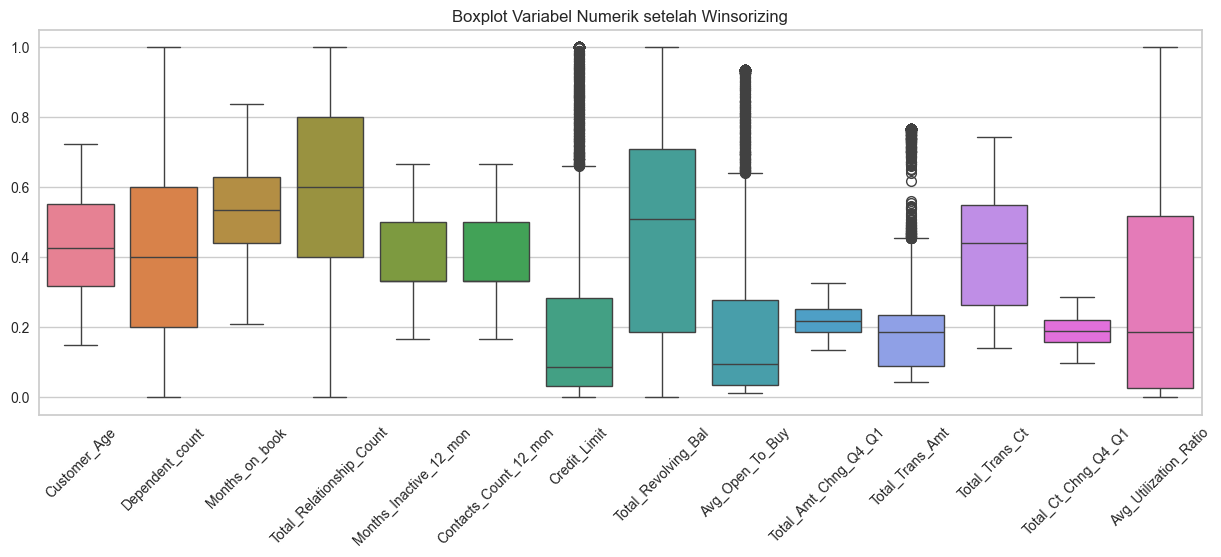

In [246]:
# Boxplot setelah Winsorizing
plt.figure(figsize=(15, 5))
sns.boxplot(data=bank_df[numerical_cols])
plt.title('Boxplot Variabel Numerik setelah Winsorizing')
plt.xticks(rotation=45)
plt.show()

In [247]:
bank_df = auto_transform_negative_outliers(bank_df)
print("\n")

Kolom 'Customer_Age' tidak memiliki outlier.
Kolom 'Dependent_count' tidak memiliki outlier.
Kolom 'Months_on_book' tidak memiliki outlier.
Kolom 'Total_Relationship_Count' tidak memiliki outlier.
Kolom 'Months_Inactive_12_mon' tidak memiliki outlier.
Kolom 'Contacts_Count_12_mon' tidak memiliki outlier.
Kolom 'Credit_Limit' memiliki 909 outlier dan nilai negatif/nol, diterapkan shift sebesar 1.0 dan transformasi log.
Kolom 'Total_Revolving_Bal' tidak memiliki outlier.
Kolom 'Avg_Open_To_Buy' memiliki 894 outlier, transformasi log1p diterapkan.
Kolom 'Total_Amt_Chng_Q4_Q1' tidak memiliki outlier.
Kolom 'Total_Trans_Amt' memiliki 808 outlier, transformasi log1p diterapkan.
Kolom 'Total_Trans_Ct' tidak memiliki outlier.
Kolom 'Total_Ct_Chng_Q4_Q1' tidak memiliki outlier.
Kolom 'Avg_Utilization_Ratio' tidak memiliki outlier.




In [248]:
check_outliers(bank_df)
print("\n")


=== Outliers per Kolom ===
Kolom 'Customer_Age' memiliki 0 outlier
Kolom 'Dependent_count' memiliki 0 outlier
Kolom 'Months_on_book' memiliki 0 outlier
Kolom 'Total_Relationship_Count' memiliki 0 outlier
Kolom 'Months_Inactive_12_mon' memiliki 0 outlier
Kolom 'Contacts_Count_12_mon' memiliki 0 outlier
Kolom 'Credit_Limit' memiliki 790 outlier
Kolom 'Total_Revolving_Bal' memiliki 0 outlier
Kolom 'Avg_Open_To_Buy' memiliki 717 outlier
Kolom 'Total_Amt_Chng_Q4_Q1' memiliki 0 outlier
Kolom 'Total_Trans_Amt' memiliki 716 outlier
Kolom 'Total_Trans_Ct' memiliki 0 outlier
Kolom 'Total_Ct_Chng_Q4_Q1' memiliki 0 outlier
Kolom 'Avg_Utilization_Ratio' memiliki 0 outlier




## 5. Encoding

In [266]:
# Kolom kategorikal
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
non_ordinal_columns = ['Gender', 'Marital_Status']
ordinal_columns = ['Education_Level', 'Income_Category', 'Card_Category']

# 1. One-Hot Encoding untuk kolom non-ordinal
df_encoded_non_ordinal = pd.get_dummies(bank_df[non_ordinal_columns], drop_first=True).astype(int)

# 2. Label Encoding untuk kolom ordinal
label_encoder = LabelEncoder()
df_encoded_ordinal = bank_df[ordinal_columns].apply(label_encoder.fit_transform)

# Gabungkan hasil encoding ke bank_df
bank_df[df_encoded_non_ordinal.columns] = df_encoded_non_ordinal
bank_df[df_encoded_ordinal.columns] = df_encoded_ordinal

# Hapus kolom asli yang telah diencoding
bank_df.drop(columns=non_ordinal_columns + ordinal_columns, inplace=True)

# Cek hasil
bank_df.dtypes
bank_df.head()

KeyError: "None of [Index(['Gender', 'Marital_Status'], dtype='object')] are in the [columns]"

## 6. Binning Data

In [250]:
#Tidak melakukan pengelompokkan data

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [251]:
kmeans = KMeans(n_clusters=3, n_init=25, random_state=42)
kmeans_labels = kmeans.fit_predict(bank_df)

bank_df['KMeans_Cluster'] = kmeans_labels
bank_df['KMeans_Cluster'].value_counts()

KMeans_Cluster
1    3499
2    2930
0    2586
Name: count, dtype: int64

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

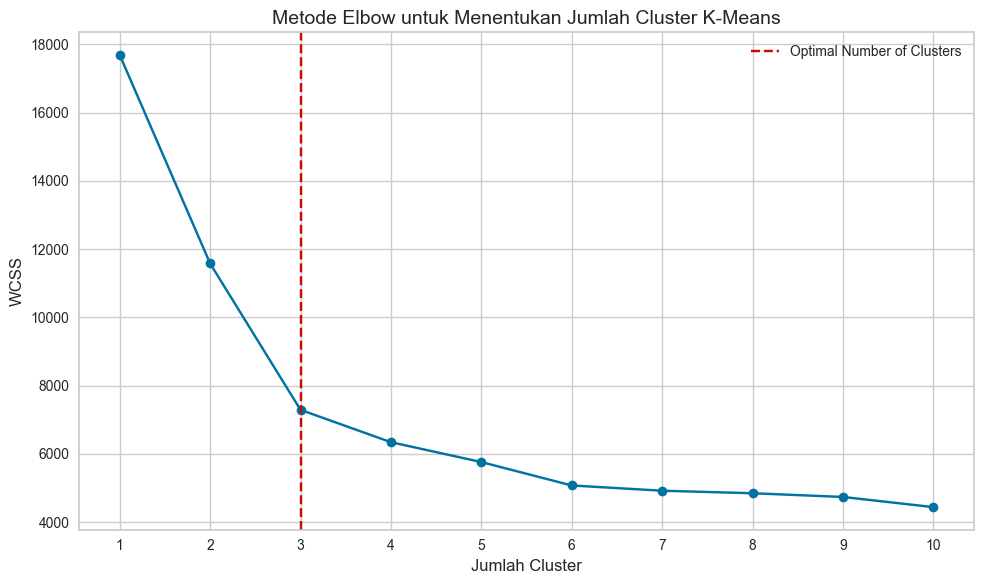

In [252]:
# Visualisasi Elbow untuk menentukan jumlah cluster optimal
n_clusters = range(1, 11)
wcss = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(bank_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(n_clusters, wcss, marker='o', color='b', linestyle='-')
plt.xlabel('Jumlah Cluster', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster K-Means', fontsize=14)
plt.grid(True)
plt.xticks(n_clusters)
plt.axvline(x=3, color='r', linestyle='--', label='Optimal Number of Clusters')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [253]:
# Menghitung Silhouette Score
kmeans_silhouette = silhouette_score(bank_df, kmeans_labels)

# Menyusun hasil clustering
clustering_scores = pd.DataFrame({
    'Clustering Method': ['K-Means'],
    'Silhouette Score': [kmeans_silhouette]
})

clustering_scores

,Clustering Method,Silhouette Score
0,K-Means,0.405451


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [254]:
# Menggunakan PCA untuk mengurangi dimensionalitas
pca = PCA(n_components=2, random_state=42)
bank_df_pca = pd.DataFrame(
    pca.fit_transform(bank_df),
    columns=['PC1', 'PC2']
)

bank_df_pca.head()

,PC1,PC2
0,1.126228,0.609600
1,-0.302439,-0.724683
2,1.102997,0.602889
3,-1.197314,0.019774
4,1.109387,0.602857


In [255]:
# Clustering dengan K-Means
kmeans = KMeans(n_clusters=3, n_init=25, random_state=42)
km_labels = kmeans.fit_predict(bank_df_pca)

bank_df_pca['KMeans_Cluster'] = km_labels
bank_df_pca['KMeans_Cluster'].value_counts()
     

KMeans_Cluster
2    3499
0    2930
1    2586
Name: count, dtype: int64

In [256]:
# Menghitung Silhouette Score
kmeans_silhouette = silhouette_score(bank_df_pca, km_labels)

# Menyusun hasil clustering
clustering_scores = pd.DataFrame({
    'Clustering Method': ['K-Means'],
    'Silhouette Score': [kmeans_silhouette]
})

clustering_scores

,Clustering Method,Silhouette Score
0,K-Means,0.854752


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [257]:
print(bank_df.columns)

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_M', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'KMeans_Cluster'],
      dtype='object')


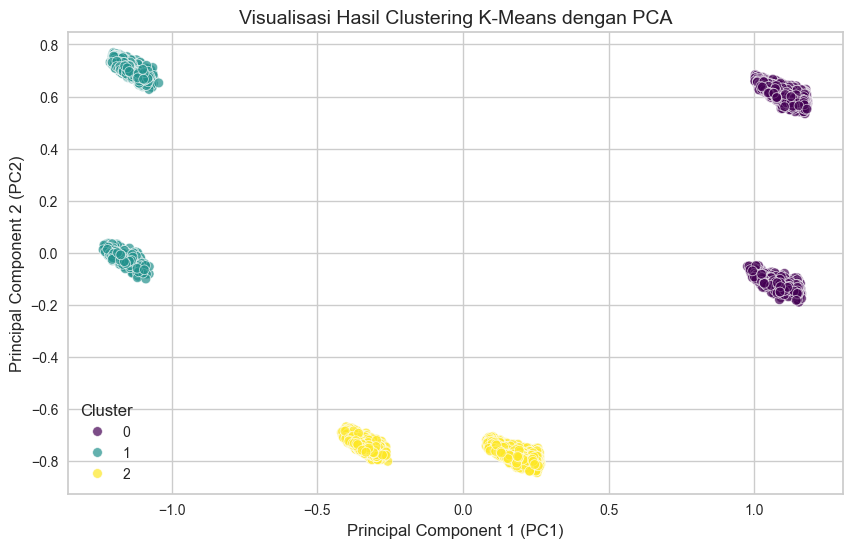

In [258]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=bank_df_pca['PC1'], 
    y=bank_df_pca['PC2'], 
    hue=bank_df_pca['KMeans_Cluster'], 
    palette='viridis', 
    alpha=0.7
)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.title('Visualisasi Hasil Clustering K-Means dengan PCA', fontsize=14)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_29464\814892993.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=bank_df_pca['KMeans_Cluster'], palette="viridis")


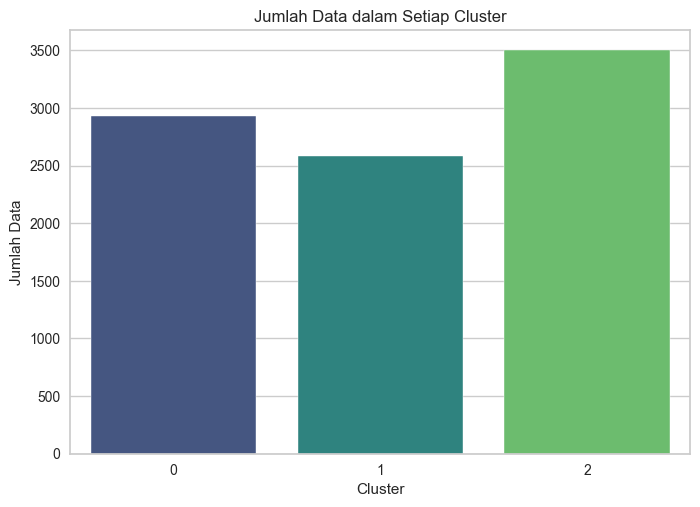

In [259]:
sns.countplot(x=bank_df_pca['KMeans_Cluster'], palette="viridis")
plt.title("Jumlah Data dalam Setiap Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.show()

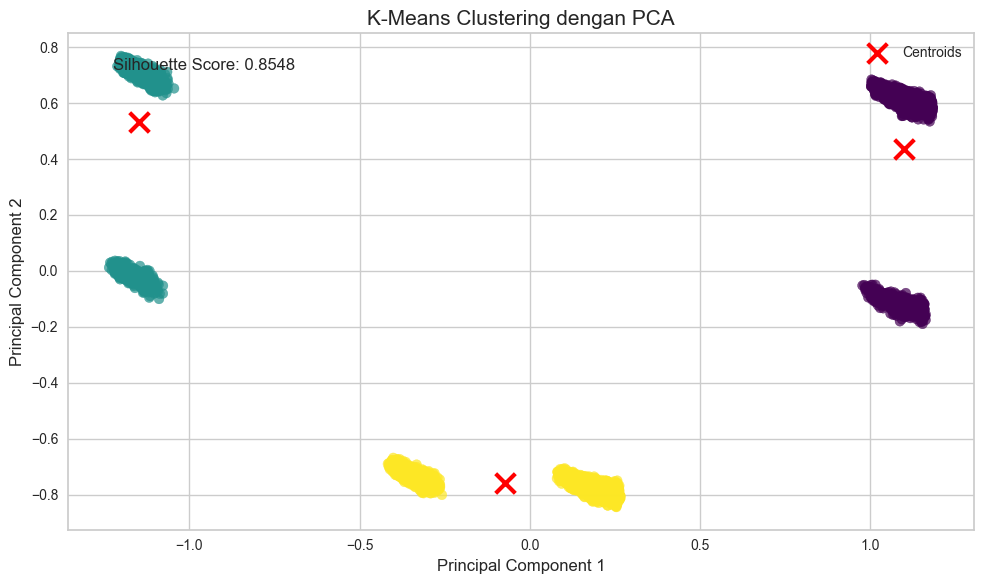

In [260]:
# Set style untuk visualisasi
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

# Membuat scatter plot dengan warna berbeda untuk setiap cluster
scatter = plt.scatter(
    bank_df_pca['PC1'], 
    bank_df_pca['PC2'], 
    c=bank_df_pca['KMeans_Cluster'], 
    cmap='viridis', 
    alpha=0.7
)

# Menambahkan centroids ke plot
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    c='red', 
    marker='x', 
    s=200, 
    linewidths=3,
    label='Centroids'
)

# Konfigurasi plot
plt.title('K-Means Clustering dengan PCA', fontsize=15)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend()

# Menambahkan informasi silhouette score
plt.text(
    0.05, 
    0.95, 
    f'Silhouette Score: {kmeans_silhouette:.4f}', 
    transform=plt.gca().transAxes, 
    verticalalignment='top'
)

plt.tight_layout()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [261]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9015 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              9015 non-null   float64
 1   Dependent_count           9015 non-null   float64
 2   Months_on_book            9015 non-null   float64
 3   Total_Relationship_Count  9015 non-null   float64
 4   Months_Inactive_12_mon    9015 non-null   float64
 5   Contacts_Count_12_mon     9015 non-null   float64
 6   Credit_Limit              9015 non-null   float64
 7   Total_Revolving_Bal       9015 non-null   float64
 8   Avg_Open_To_Buy           9015 non-null   float64
 9   Total_Amt_Chng_Q4_Q1      9015 non-null   float64
 10  Total_Trans_Amt           9015 non-null   float64
 11  Total_Trans_Ct            9015 non-null   float64
 12  Total_Ct_Chng_Q4_Q1       9015 non-null   float64
 13  Avg_Utilization_Ratio     9015 non-null   float64
 14  Gender_M    

In [262]:
# Tambahkan hasil label cluster ke DataFrame yang telah dinormalisasi
bank_df['KMeans_Cluster']= km_labels

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

#### Inverse Normalisasi dengan MinMaxScaler

In [263]:
bank_df[numerical_cols] = scaler.inverse_transform(bank_df[numerical_cols])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [267]:
bank_df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,KMeans_Cluster
count,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000,9015.000000
mean,46.364725,2.354964,35.943649,3.812313,2.298059,2.467110,27502.384363,1168.703938,5959.486761,0.750367,3839.685946,64.410427,0.702461,0.281565,0.523239,0.465225,0.388131,0.073988,1.063117
std,7.404003,1.295146,7.111020,1.556154,0.892373,0.973124,3780.131279,813.063816,6502.297117,0.169811,2418.511620,22.069437,0.181275,0.278482,0.499487,0.498817,0.487352,0.261766,0.842164
min,33.000000,0.000000,22.000000,1.000000,1.000000,1.000000,24366.014494,0.000000,462.921872,0.462000,1257.920930,28.000000,0.367700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000,24895.356286,466.000000,1218.347839,0.629000,2050.093341,44.000000,0.582000,0.026000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,25781.635638,1281.000000,3129.967499,0.736000,3588.623090,67.000000,0.702000,0.185000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,28747.437875,1783.500000,8450.430841,0.858000,4311.569304,81.000000,0.818000,0.516000,1.000000,1.000000,1.000000,0.000000,2.000000
max,60.000000,5.000000,49.000000,6.000000,4.000000,4.000000,37777.867701,2517.000000,22770.110281,1.108000,10722.954645,106.000000,1.067000,0.999000,1.000000,1.000000,1.000000,1.000000,2.000000


In [270]:
# Menyusun statistik deskriptif berdasarkan cluster
cluster_stats = bank_df.groupby('KMeans_Cluster').describe()

print(cluster_stats)

               Customer_Age                                               \
                      count       mean       std   min   25%   50%   75%   
KMeans_Cluster                                                             
0                    2930.0  46.121160  7.180499  33.0  41.0  46.0  51.0   
1                    2586.0  46.705723  7.174181  33.0  42.0  47.0  52.0   
2                    3499.0  46.316662  7.740671  33.0  40.0  46.0  52.0   

                     Dependent_count            ... Marital_Status_Single  \
                 max           count      mean  ...                   75%   
KMeans_Cluster                                  ...                         
0               60.0          2930.0  2.410239  ...                   0.0   
1               60.0          2586.0  2.375483  ...                   0.0   
2               60.0          3499.0  2.293512  ...                   1.0   

                    Marital_Status_Unknown                                     \

Tulis hasil interpretasinya di sini.
1. Cluster 1: 
2. Cluster 2: 
3. Cluster 3: 

Diubah

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [272]:
bank_df.to_csv('Dataset_inisiasi.csv', index=False)